# 지하철 하차인원 EDA

In [212]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'].insert(0, 'Malgun Gothic')
pd.options.display.float_format = '{:.5f}'.format

In [213]:
df=pd.read_excel('데청캠\서울 지하철역 마스터시트.xlsx')
df.head()

,역사명,자치구,역위도,역경도,역사도로명주소,근처 공연장수,공연건수,예매건수,퇴근시간 하차인원(17시~1시),신용판매금액,문화예술관람,한 공연당 예매건수
0,가락시장,송파구,37.49277,127.11790,서울특별시 송파구 송파대로 지하 257 (가락동),3,144,314120,2601550,1801,4.80000,6544.16700
1,가산디지털단지,금천구,37.48122,126.88260,서울특별시 금천구 벚꽃로 309 (가산동),7,52,18582,1986397,1092,7.00000,2501.42300
2,강남,강남구,37.49720,127.02810,서울특별시 강남구 강남대로 지하 396 (역삼동),32,717,729016,8523024,2326,9.00000,32536.28000
3,강남구청,강남구,37.51715,127.04120,서울특별시 강남구 학동로 지하346 (삼성동),32,166,254494,1074613,2326,9.00000,49059.08000
4,강동,강동구,37.53588,127.13210,서울특별시 강동구 천호대로 지하1097 (천호동),3,31,30650,3522083,1518,4.10000,2966.12900


In [216]:
print (df.index[(df['퇴근시간 하차인원(17시~1시)'] == 0)].tolist())

[134]


In [217]:
na = [134]
for row in na:
    print(df.loc[row])
    print('-----------------------------')

역사명                                     신내
자치구                                    중랑구
역위도                               37.61264
역경도                              127.10340
역사도로명주소              서울특별시 중랑구 용마산로136길 33
근처 공연장수                                  1
공연건수                                     1
예매건수                                  4693
퇴근시간 하차인원(17시~1시)                        0
신용판매금액                                1262
문화예술관람                             5.10000
한 공연당 예매건수                      4693.00000
Name: 134, dtype: object
-----------------------------


In [218]:
df = df.drop(index=na, axis=0)

In [219]:
df.rename(columns={'퇴근시간 하차인원(17시~1시)':'하차인원'},inplace=True)

In [220]:
df.describe()

,역위도,역경도,근처 공연장수,공연건수,예매건수,하차인원,신용판매금액,문화예술관람,한 공연당 예매건수
count,233.00000,233.00000,233.00000,233.00000,233.00000,233.00000,233.00000,233.00000,229.00000
mean,37.54635,127.00644,29.40773,263.99571,434749.44206,2867285.42060,1567.73820,5.76180,55276.00162
std,0.04575,0.08294,44.64275,381.21500,725406.02296,2484833.18426,345.81916,2.25699,93477.29506
min,37.46425,126.80150,0.00000,0.00000,0.00000,126606.00000,1092.00000,1.60000,2.00000
25%,37.51012,126.94580,4.00000,27.00000,9787.00000,1285871.00000,1320.00000,4.10000,2966.12900
50%,37.54538,127.01570,12.00000,94.00000,141726.00000,2104330.00000,1467.00000,5.30000,15199.56000
75%,37.57139,127.06780,30.00000,322.00000,406829.00000,3326122.00000,1635.00000,7.40000,47907.94000
max,37.68923,127.16530,167.00000,1464.00000,2845374.00000,16652081.00000,2336.00000,10.80000,365279.20000


  ### 자치구별 인구 데이터로 실제 거주지 확인

In [221]:
import folium
import json
import re

In [222]:
map1 = folium.Map(location=[37.55, 126.98], zoom_start=10.5, tiles='Stamen Terrain')

In [223]:
geo_json='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [224]:
df2=pd.read_excel('데청캠\서울 자치구별 인구수.xlsx',header=1)
df2=df2[['행정구역별(읍면동)','총인구(명)']]
df2.columns=['name','values']
df2=df2[1:]
df2=df2.sort_values(by='name')
df2['name']=df2['name'].apply(lambda x: re.compile('[가-힣]+').findall(x)[0])
df2

,name,values
23,강남구,508135
25,강동구,444434
9,강북구,299535
16,강서구,564854
21,관악구,502641
5,광진구,353967
17,구로구,435442
18,금천구,249419
11,노원구,511982
10,도봉구,315979


In [225]:
folium.Choropleth(
    geo_data=geo_json,
    data=df2,
    columns=['name','values'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.3
).add_to(map1)

map1

In [226]:
df_loc=df[['역사명','역위도','역경도','하차인원']]
df_loc

,역사명,역위도,역경도,하차인원
0,가락시장,37.49277,127.11790,2601550
1,가산디지털단지,37.48122,126.88260,1986397
2,강남,37.49720,127.02810,8523024
3,강남구청,37.51715,127.04120,1074613
4,강동,37.53588,127.13210,3522083
...,...,...,...,...
229,홍제,37.58852,126.94420,3715896
230,화곡,37.54176,126.84030,6908265
231,화랑대,37.62013,127.08440,2264901
232,회현,37.55852,126.97810,811553


In [227]:
df_loc = df_loc.sort_values(by='하차인원',ascending=False)

In [228]:
df_loc_top=df_loc.head(50)
df_loc_bot=df_loc.tail(50)

In [229]:
map2 = folium.Map(location=[37.55, 126.98], zoom_start=11)

In [230]:
#하차인원 많은 상위 50개 역
for station in df_loc_top.index:
    lat = df_loc_top.loc[station,'역위도']
    long = df_loc_top.loc[station,'역경도']
    folium.CircleMarker([lat,long],
                       radius=df_loc_top.loc[station,'하차인원']/300000,
                       popup=df_loc_top.loc[station,'역사명'],
                       color='blue',
                       fill = True
                       ).add_to(map2)
    
#하차인원 적은 하위 50개 역
for station in df_loc_bot.index:
    lat = df_loc_bot.loc[station,'역위도']
    long = df_loc_bot.loc[station,'역경도']
    folium.CircleMarker([lat,long],
                       radius=df_loc_bot.loc[station,'하차인원']/300000,
                       popup=df_loc_bot.loc[station,'역사명'],
                       color='red',
                       fill = True
                       ).add_to(map2)
map2

### 하차인원 많은 곳과 실거주지 시각화

In [231]:
#하차인원 많은 50개 역과 2013년 기준 인구밀집도 시각화

for station in df_loc_top.index:
    lat = df_loc_top.loc[station,'역위도']
    long = df_loc_top.loc[station,'역경도']
    folium.CircleMarker([lat,long],
                       radius=df_loc_top.loc[station,'하차인원']/300000,
                       popup=df_loc_top.loc[station,'역사명'],
                       color='blue',
                       fill = True
                       ).add_to(map1)
map1

### 피어슨 상관계수 확인

In [35]:
df.loc[df['하차인원']<=1285871, 'pop']=0
df.loc[(df['하차인원']<=2104330)&(df['하차인원']>1285871), 'pop']=1
df.loc[(df['하차인원']<=3326122)&(df['하차인원']>2104330), 'pop']=2
df.loc[df['하차인원']>3326122, 'pop']=3

In [40]:
df.loc[df['예매건수']<=9787, 'grade']=0
df.loc[(df['예매건수']<=141726)&(df['예매건수']>9787), 'grade']=1
df.loc[(df['예매건수']<=406829)&(df['예매건수']>141726), 'grade']=2
df.loc[df['예매건수']>406829, 'grade']=3

In [46]:
corr = df.corr()
corr = df.agg('corr')
corr = df[['근처 공연장수', '문화예술관람', 'pop', 'grade']].corr()
corr = df[['근처 공연장수', '문화예술관람', 'pop', 'grade']].agg('corr')
corr

,근처 공연장수,문화예술관람,pop,grade
근처 공연장수,1.00000,-0.27484,-0.16508,0.63248
문화예술관람,-0.27484,1.00000,-0.00035,-0.10636
pop,-0.16508,-0.00035,1.00000,-0.25582
grade,0.63248,-0.10636,-0.25582,1.00000


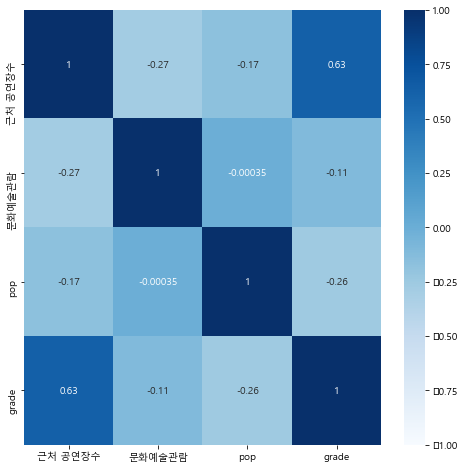

In [50]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(corr, annot = True, cmap = 'Blues', vmin = -1, vmax=1)
plt.show()